# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 2. Методы нахождения оценок
### Дедлайн --- 26 октября 9:00

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в <a href=https://docs.google.com/document/d/1kd85QRAS8fbxRxpMzP2IsbQ_YcVsU-Aczqd6ErXgIDg/edit#>этой папке</a>.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов.

Загрузим все необходимые датасеты. Если что-то пошло не так, то просто скачайте файлы по ссылке вручную.

In [ ]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
!gdown https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs

Downloading...
From: https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
To: /content/Cauchy.csv
100% 18.7k/18.7k [00:00<00:00, 30.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs
To: /content/Weibull.csv
100% 17.9k/17.9k [00:00<00:00, 16.8MB/s]


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as sps

import tqdm

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.4)

## Задача 1

На высоте 1 метр от поверхности Земли закреплено устройство,
которое периодически излучает лучи на поверхность Земли (считайте,
что поверхность Земли представляет из себя прямую). Пусть $l$ —
перпендикуляр к поверхности Земли, опущенный из точки, в которой
закреплено устройство. Угол к прямой $l$ (под которым происходит
излучение) устройство выбирает случайно из равномерного
распределения на от\-резке $\left(-\frac{\pi}{2}, \frac{\pi}{2}\right)$ (все выборы
осуществляются независимо). В этих предположениях точки пересечения
с поверхностью имеют распределение Коши с плотностью $p(x) =
\frac{1}{\pi(1 + (x-x_0)^2)}.$ Неизвестный параметр сдвига $x_0$
соответствует проекции точки расположения устройства на поверхность
Земли (направление оси и начало координат на поверхности Земли
выбраны заранее некоторым образом независимо от расположения
устройства). В файле Cauchy.csv находятся координаты точек
пересечения лучей с поверхностью Земли.

In [ ]:
sample_1 = pd.read_csv("Cauchy.csv")["sample"].values

 Оцените параметр сдвига
методом максимального правдоподобия 
* по первым 10 измерениям
* по первым 100 измерениям
* по всей выборке. 

Оценку произведите по сетке (т.е. возьмите набор
точек с некоторым шагом и верните ту, на которой достигается
максимум функции правдоподобия). Известно, что параметр сдвига принадлежит интервалу $[-1000, 1000].$ Выберите шаг равным 0.01. Интервал можете итеративно уменьшать, но не стоит делать его длину меньше 50.


In [ ]:
def ln_coshi(sample,x_0):
    return np.log(np.pi * (1 + (sample - x_0) ** 2)) * (-1)

In [ ]:
def likelihood_function(sample, x_0_array, ln_func):
    sample_matrix = np.array([sample,]*len(x_0_array)).transpose()
    ln_result_matrix = ln_func(sample_matrix, x_0_array)
    x_0_prod_aray = np.sum(ln_result_matrix, axis = 0)
    best_index_x0 = np.argmax(x_0_prod_aray)
    
    return x_0_array[best_index_x0]

In [ ]:
loc = likelihood_function(sample_1, list(np.linspace(-1000, 1000, 200000)), ln_coshi)
print('loc = ', loc)

loc =  207.97603988019932


Сравните полученные результаты с `sps.cauchy.fit`

In [ ]:
sps.cauchy.fit(sample_1)

(207.97772827944334, 0.9451391657739621)

__Вывод__ : можно заметить, что результаты совпадают с точностью до тысячных.

## Задача 2
В банкомате "Тинькофф" в Новом Корпусе МФТИ каждую минуту подсчитывается баланс по
сравнению с началом дня (6 часов утра). В полночь работники банка
измеряют две величины: $X^1$ – максимальное значение баланса за
день, $X^2$ – значение баланса в полночь. Считается, что величина
$X = X^1 - X^2$ имеет распределение Вейбулла с функцией распределения $F(x) = 1 - e^{-x^\gamma} (x > 0),$ где $\gamma > 0$ –
параметр формы. В течение 10 лет каждый день банк проводил
измерение величины $X,$ получив в результате выборку $X_1, \ldots,
X_{3652}.$ В файле Weibull.csv находятся соответствующие измерения.

In [ ]:
sample_2 = np.loadtxt("Weibull.csv")

Проведем небольшой предварительный анализ. Итак, если наши данные распределены согласно распределению Вейбулла, то справедливы следующие рассуждения:
$$
\begin{aligned} F(x) &=1-e^{-(x)^{\gamma}} \\-\ln (1-F(x)) &=x^{\gamma} \\ \underbrace{\ln (-\ln (1-F(x)))}_{y^{\prime}} &=\underbrace{\gamma \ln x}_{\text {kx }^{\prime}} \end{aligned}
$$
А значит и
$$
\underbrace{\ln (-\ln (1-\hat{F}(x)))}_{y^{\prime}} ≈\underbrace{\gamma \ln x}_{\text {kx }^{\prime}}
$$
Подсчитайте эмпирическую функцию распределения и 
$$y\prime = \ln (-\ln (1-\hat{F}(x))) \quad x' = ln x$$
 где $x$ – элементы исходной выборки. Постройте график (`plt.scatter`) выделив данные за первые четыре года красным цветом (`sample_2[:1461]`), остальные синим (`sample_2[1461:]`). Не забудьте про `alpha=0.05` и легенду. Такой график называется `Weibull plot` и является аналогом `qqplot` для распределения Вейбулла. 


In [ ]:
#проблема:
print(sum(sample_2 == 0)) 

507


In [ ]:
#возможное решение:
sample_2 = sample_2[sample_2 != 0]

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

f_lid = ECDF(sample_2)(sample_2)
sample_2 = sample_2[f_lid != 1]
f_lid = f_lid[f_lid != 1]

y_hatch_first = np.log((-1)*np.log(1-f_lid[:1461]))
x_hatch_first = np.log(sample_2[:1461])

y_hatch_second = np.log((-1)*np.log(1-f_lid[1461:]))
x_hatch_second = np.log(sample_2[1461:])

y_hatch = np.log((-1)*np.log(1-f_lid))
x_hatch = np.log(sample_2)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


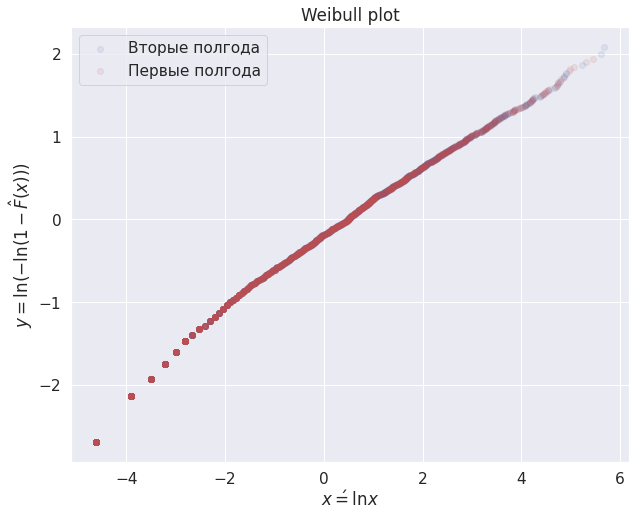

In [ ]:
sns.set(style="darkgrid", font_scale=1.4)
plt.figure(figsize=(10,8))
plt.title('Weibull plot')
plt.scatter(x_hatch_second, y_hatch_second, alpha = 0.1, c = 'b', label = 'Вторые полгода')
plt.scatter(x_hatch_first, y_hatch_first, alpha = 0.1, c = 'r',label = 'Первые полгода')
plt.ylabel(r'$y = \ln (-\ln (1-\hat{F}(x)))$')
plt.xlabel(r'$x\' = \ln x$')
plt.legend()
plt.show()

Сделайте вывод.

**Вывод** По графику можно заметить, что $\gamma ≈ \frac{3}{4}$.

Оцените параметр формы методом максимального правдоподобия 
* по
первым 4 годам; 
* по всей выборке.
Оценку произведите по сетке (в
логарифмической шкале). Известно, что $\log_{10}\gamma \in [-2, 2].$
Выберите шаг равным $10^{-3}.$

In [ ]:
def ln_weibull(sample_matrix, gamma_array):
    return -1* np.power(sample_matrix, gamma_array) + np.log(gamma_array) + np.log(sample_matrix) * gamma_array

Сравните результаты с `sps.weibull.fit(sample_2, fscale=1, floc=0)`

In [ ]:
с%%time
gamma_first = likelihood_function(sample_2[:1461], list(np.linspace(0.01, 100, 100000)), ln_weibull)
gamma_all = likelihood_function(sample_2, list(np.linspace(0.01, 100, 100000)), ln_weibull)
print('gamma первые 4 года = ', gamma_first)
print('gamma во всей выборке = ', gamma_all)
gamma = sps.weibull_min.fit(sample_2, fscale=1, floc=0)[0]
print('истинный gamma = ', gamma)

gamma первые 4 года =  0.4139636396363963
gamma во всей выборке =  0.41196381963819634
истинный gamma =  0.4115234374999995
CPU times: user 43.3 s, sys: 947 ms, total: 44.2 s
Wall time: 44.2 s


Постройте график $y = \gamma \cdot x$ для всех полученных $\gamma$ (`plt.plot`) и `scatter plot` из предыдущего пункта ($y\prime \ x\prime$). Хорошо ли линии соответствуют выборке? Как вы думаете, почему?


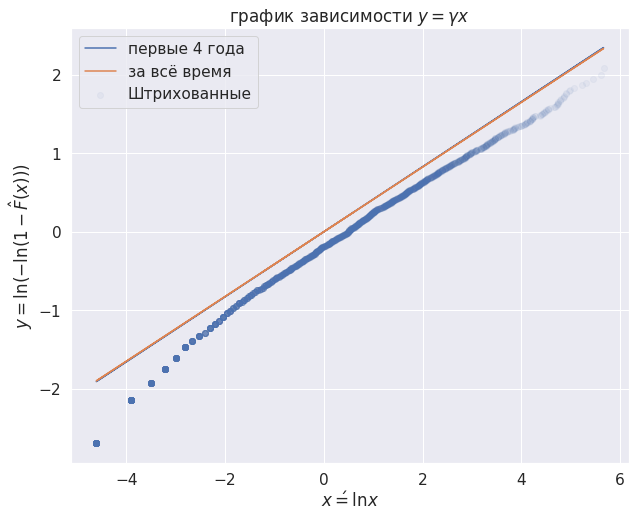

In [ ]:
def line(k,x):
    return k*x
sns.set(style="darkgrid", font_scale=1.4)
plt.figure(figsize=(10,8))
plt.title(r'график зависимости $y=\gamma x$')
plt.scatter(x_hatch, y_hatch, alpha = 0.05, label = 'Штрихованные')
plt.plot(x_hatch, line(gamma_first,x_hatch), label = 'первые 4 года')
plt.plot(x_hatch, line(gamma_all,x_hatch), label = 'за всё время')
plt.ylabel(r'$y = \ln (-\ln (1-\hat{F}(x)))$')
plt.xlabel(r'$x\' = \ln x$')
plt.legend()
plt.show()

**Вывод** ММП дал смещенную оценку.

Сравните результаты с `sps.weibull.fit(sample_2, fscale=1, floc=0)`

## Задача 3

Сгенерируйте выборки $X_1, \ldots, X_N$ из $\mathit{N}(0, \theta)$, $U(0, \theta)$, $\Gamma(1, \theta)$ (**параметризация $k, \theta$**), $\theta = 3$ для всех распределений $(N = 1000).$ Для всех $n \leq N$ посчитайте значения оценок (по выборке $X_1, \ldots X_n$) методом моментов. Постройте график ошибки оценки от реального значения ($|\hat\theta - \theta|_{l_1}$) относительно размера выборки.

In [ ]:
N = 10000
THETA = 3
samples_norm = sps.norm(loc = 0, scale = np.sqrt(THETA)).rvs(N)
samples_uniform = sps.uniform(0, THETA).rvs(N)
samples_gamma = sps.gamma(a = 1, loc = 0, scale = THETA).rvs(N)

In [ ]:
def first_moment(x_array):
    return np.cumsum(x_array)/np.array(range(1,1+len(x_array)))
def second_moment(x_array):
    return np.cumsum((x_array)** 2) / np.array(range(1,1+len(x_array))) 

In [ ]:
array_dif_theta_norm = abs(second_moment(samples_norm) - THETA)
array_dif_theta_uniform = abs(first_moment(samples_uniform)*2 - THETA)
array_dif_theta_gamma = abs(first_moment(samples_gamma) - THETA)

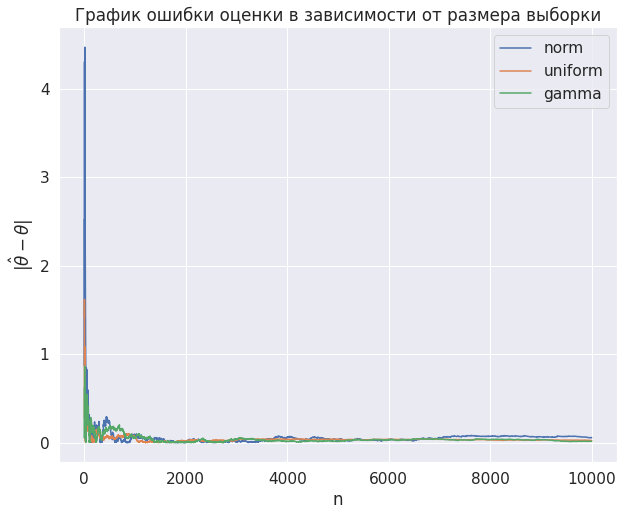

In [ ]:
array_y = [array_dif_theta_norm, array_dif_theta_uniform, array_dif_theta_gamma]
array_label = ['norm', 'uniform', 'gamma']
x = np.array(range(1,N+1))
sns.set(style="darkgrid", font_scale=1.4)
plt.figure(figsize=(10,8))
plt.title('График ошибки оценки в зависимости от размера выборки')
for y, label in zip(array_y, array_label):
    plt.plot(x, y, label = label)
plt.xlabel('n')
plt.ylabel(r'$|\hat\theta - \theta|$')
plt.legend()
plt.show()

#### Бутстреп

Для реальных данных часто сложно подобрать распределение и нужную параметризацию относительно $\theta$. Кроме того на практике сложно посчитать дисперсию оценки (для этого хотя бы нужно знать распределение, из которого пришла выборка). На помощь в таких случаях приходит **бутстреп**.

Идея очень простая. Давайте возьмем нашу выборку размера $N$ и сгенерируем из нее еще $K$ выборок. Более формально для каждой бутстрепной выборки N раз будем выбирать элементы из исходной выборки с возвращением. Полученная таким образом выборка будет содержать $\approx 63$% уникальных элементов, но это не страшно. Для всех $K$ выборок посчитаем оценку $\hat\theta$. Таким образом мы получим $K$ оценок параметра. Можно показать, что если размер бутстрепных выборок и исходной совпадают, то оценка дисперсии $s^2(\hat\theta)$, полученная из $K$ оценок, будет *хорошей*.

Для каждого распределения из предыдущего пункта (Пожалуйста, не пишите цикл по распределениям. Сделайте три отдельные ячейки) для каждого $K$ из `[10] + [50] + list(range(100, 1001, 100))` сгенерируйте K бутстрепных выборок и посчитайте дисперсию бутстрепных оценок и посчитайте среднее по K выборкам. Размер бутстрепной выборки сделайте равным $K$, незабудьте уменьшить размер исходной выборки до $K$. Постройте график следующим образом: по оси $x$ отложите значения $K$, красной линией обозначьте среднее значение $\hat\theta$ бутстрепных выборок для каждого $K$. Посчитайте стандартное отклонение оценки для каждого $K$ и закрасьте интервал $\mu(k) \pm \sigma(\hat\theta)$ (`plt.fillbetween`).



In [ ]:
def sample_variance(samples):
    k = len(list(samples))
    mean_square = np.sum(samples ** 2) / (k-1)
    square_average = (np.sum(samples)**2) / (k * (k-1))
    return abs(mean_square) - abs(square_average)

In [ ]:
def get_k_bootstrap_samples(samples_len_k):
    k = len(samples_len_k)
    matrix_ind = np.random.randint(0,k, (k,k))
    return samples_len_k[matrix_ind]

In [ ]:
def beaut_plot(array_k, array_var, title):
  mean_var = np.array(array_var)[:,0]
  sqrt_var = np.array(array_var)[:,1]
  sns.set_style("whitegrid")
  plt.figure(figsize=(15, 10))
  plt.plot(
      array_k, 
      mean_var, 
      color='red', 
      linewidth=2.5, 
      label='average var'
  ) 
  plt.fill_between(
      x=array_k, 
      y1=mean_var + sqrt_var,
      y2=mean_var - sqrt_var,
      alpha=0.15
  )
  plt.title(title)
  plt.legend()
  plt.xlabel('k')
  plt.ylabel('average var')
  plt.show()

In [ ]:
array_k = [10] + [50] + list(range(100, 1001, 100))

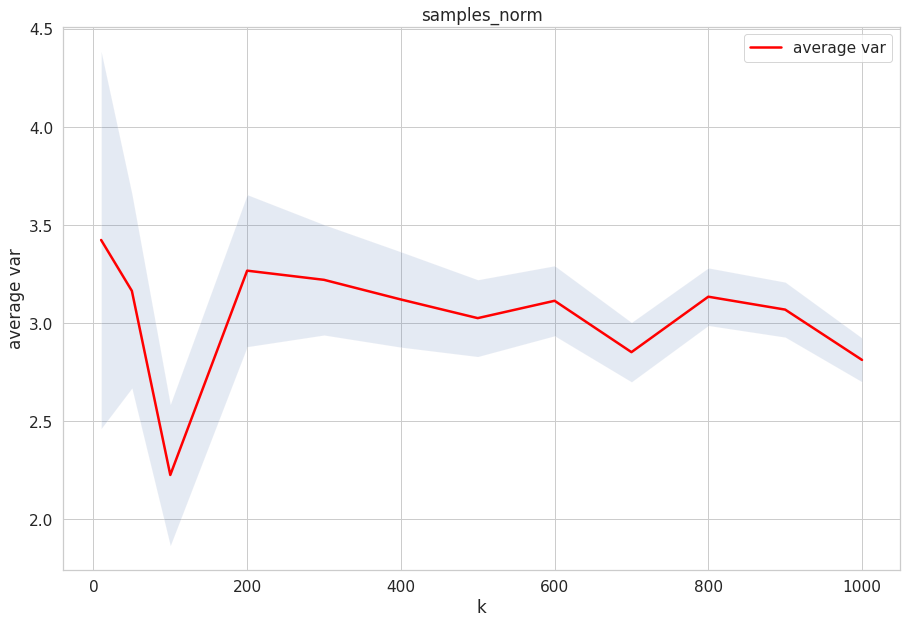

In [ ]:
array_var_for_k_norm = boostrap_mean(array_k, samples_norm)
beaut_plot(array_k, array_var_for_k_norm, "samples_norm")

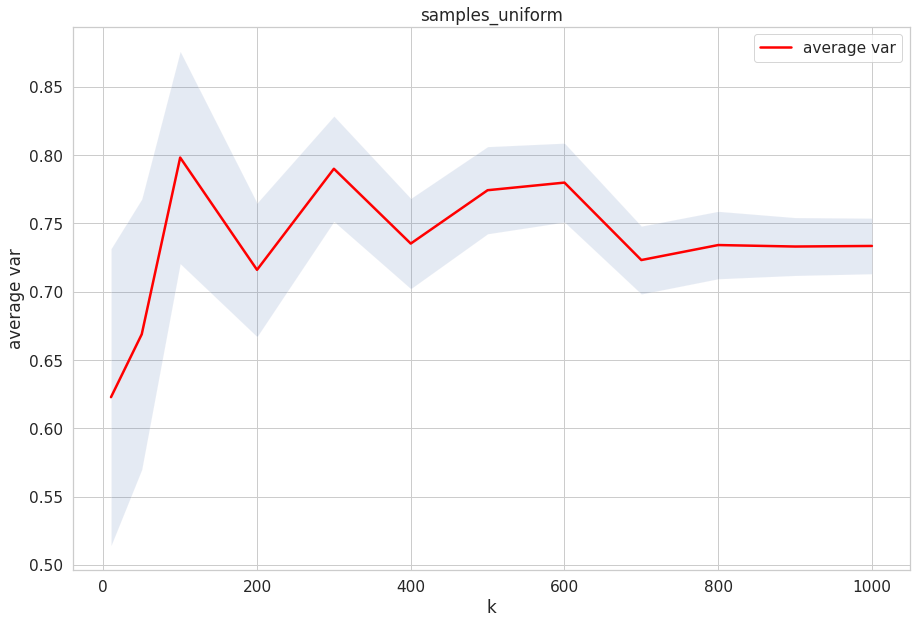

In [ ]:
array_var_for_k_uniform = boostrap_mean(array_k, samples_uniform)
beaut_plot(array_k, array_var_for_k_uniform, "samples_uniform")

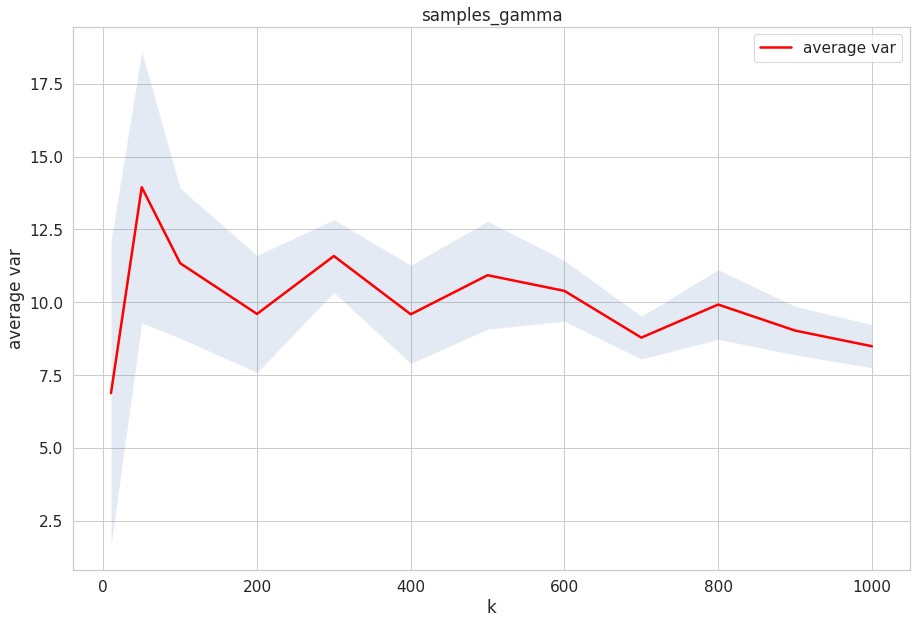

In [ ]:
array_var_for_k_gamma = boostrap_mean(array_k, samples_gamma)
beaut_plot(array_k, array_var_for_k_gamma, "samples_gamma")